In [1]:
import csv
import patsy
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

C:\Users\Jimmy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
players = pd.read_csv("keepers.csv", encoding='latin-1')

In [3]:
players = players[players.Year != "Career Totals"]
players = players[players.GP > 3]
players = players.groupby(["Player", "Year"]).first().reset_index()
players["Player"] = players.Player.str.rstrip()
players.head()

,Player,Year,Position,Club,GP,GS,MINS,SHO,SV,GA,PKG,PKA,W,L,T
0,Alec Kann,2016,Goalkeeper,Sporting Kansas City,7,7,630,2,17,11,0,0,2,2,3
1,Alec Kann,2017,Goalkeeper,Atlanta United,18,18,1620,4,56,25,4,4,8,7,3
2,Alex Bono,2016,Goalkeeper,Toronto FC,16,15,1370,4,42,16,1,1,8,3,5
3,Alex Bono,2017,Goalkeeper,Toronto FC,29,28,2570,10,72,32,3,5,19,4,6
4,Andre Blake,2015,Goalkeeper,Philadelphia Union,6,6,540,2,26,9,1,1,2,3,1


In [4]:
players_adj = players.copy(deep = True)
players_adj[['SHO', 'SV', 'GA', 'PKG', "PKA", 'W', 'L', 'T']] = players_adj[['SHO', 'SV', 'GA', 'PKG', "PKA", 'W', 'L', 'T']].div(players.GP, axis=0)
pd.options.display.float_format = '{:,.4f}'.format

In [5]:
#sns.pairplot(players.iloc[:, 3:]);

In [6]:
test = players_adj[players_adj.Year == "2018"]
train = players_adj[players_adj.Year != "2018"]

In [7]:
y, X = patsy.dmatrices('GA ~ SHO + L', data=train, return_type="dataframe")
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GA   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     96.90
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           7.41e-28
Time:                        10:44:43   Log-Likelihood:                 5.0637
No. Observations:                 155   AIC:                            -4.127
Df Residuals:                     152   BIC:                             5.003
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3536      0.090     15.072      0.000       1.176       1.531
SHO           -1.3634      0.183     -7.435      0.000      -1.726      -1.001
L              1.0211      0.150      6.822      0.000       0.725       1.317
==============================================================================
Omnibus:                        5.210   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                7.281
Skew:                           0.092   Prob(JB):                       0.0262
Kurtosis:                       4.046   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
test_players = test[test.Player == "Sean Johnson"]
test_players = test_players.append(test[test.Player == "Tim Howard"])
test_players = test_players.append(test[test.Player == "Brad Guzan"])
test_players = test_players.append(test[test.Player == "Tim Melia"])
test_players = test_players.append(test[test.Player == "David Bingham"])
test_players = test_players.append(test[test.Player == "Nick Rimando"])
test_players = test_players.append(test[test.Player == "Jimmy Maurer"])
test_players.head(8)

,Player,Year,Position,Club,GP,GS,MINS,SHO,SV,GA,PKG,PKA,W,L,T
139,Sean Johnson,2018,Goalkeeper,New York City FC,8,8,720,0.3750,3.5000,1.1250,0.0000,0.0000,0.6250,0.1250,0.2500
161,Tim Howard,2018,Goalkeeper,Colorado Rapids,6,6,470,0.3333,3.1667,0.8333,0.0000,0.0000,0.3333,0.1667,0.3333
27,Brad Guzan,2018,Goalkeeper,Atlanta United,7,7,630,0.4286,2.1429,1.1429,0.1429,0.1429,0.7143,0.1429,0.1429
165,Tim Melia,2018,Goalkeeper,Sporting Kansas City,8,8,720,0.3750,2.7500,1.3750,0.0000,0.0000,0.6250,0.1250,0.2500
59,David Bingham,2018,Goalkeeper,LA Galaxy,7,7,630,0.2857,3.8571,1.4286,0.1429,0.2857,0.4286,0.4286,0.1429
128,Nick Rimando,2018,Goalkeeper,Real Salt Lake,7,7,630,0.2857,3.7143,2.0000,0.2857,0.4286,0.4286,0.4286,0.1429
83,Jimmy Maurer,2018,Goalkeeper,FC Dallas,6,6,540,0.5000,3.5000,0.5000,0.0000,0.0000,0.5000,0.0000,0.5000


In [9]:
predictions = fit.predict(test_players[['GA', 'SHO', 'L']])
predictions

139    1.1392
161    0.8437
27     1.1086
165    1.4776
59     1.9818
128    2.7554
83    -0.0049
dtype: float64

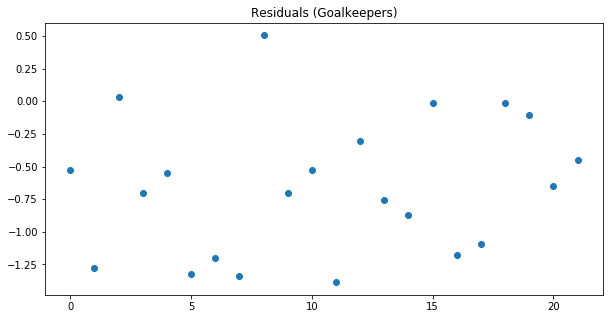

In [10]:
predictions = fit.predict(test[['GA', 'SHO', 'L']])
expected = 0.0
for prediction in predictions:
    expected += prediction
expected
residuals = (test.GA - predictions).reset_index()
residuals = residuals.drop(["index"], 1)
residuals.plot(style = 'o', legend = False, title = "Residuals (Goalkeepers)", figsize = (10,5))
